# Fetching the MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# Setting up the dataset
X, y = mnist["data"], mnist["target"]

# Looking at the data

In [5]:
type(X)

numpy.ndarray

In [6]:
len(X)

70000

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

# Train test split

In [9]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [10]:
X_train.shape

(60000, 784)

In [11]:
y_train.shape

(60000,)

# Looking at the data more

In [13]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
some_digit = X_train[0]

some_digit_image = np.reshape(some_digit, (28, 28))

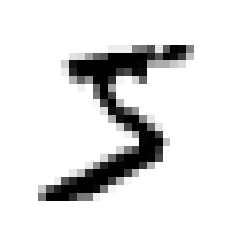

In [17]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [18]:
y[0]

'5'

In [37]:
y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

In [20]:
y[0]

5

# Binary classifer to determine if the number is 7 or not

In [38]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_classifier =  SGDClassifier(max_iter=1000, tol=1e-3)

In [41]:
sgd_classifier.fit(X_train, y_train_7)

SGDClassifier()

In [43]:
sgd_classifier.predict([some_digit])

array([False])

## Checking accuracy of the SGDClassifier

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.9756 , 0.9805 , 0.97095])

## Playing with other matrics to see how the SGDClassifier performs

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [46]:
sgd_predicted_values = cross_val_predict(sgd_classifier, X_train, y_train_7, cv=3)

In [47]:
sgd_confusion_matrix = confusion_matrix(y_train_7, sgd_predicted_values)

In [48]:
sgd_confusion_matrix

array([[52943,   792],
       [  617,  5648]], dtype=int64)

In [49]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_7, sgd_predicted_values)

0.8770186335403727

In [50]:
recall_score(y_train_7, sgd_predicted_values)

0.9015163607342378

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train_7, sgd_predicted_values)

0.8890987800078709

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, sgd_predicted_values)

0.9433886819024311